0 1001 L_V1
1 1002 L_MST
2 1006 L_V4
3 1007 L_V8
4 1008 L_4
0 1070 L_8BL
1 1069 L_9m
2 1098 L_s6-8
3 1010 L_FEF
4 1052 L_2
0 1039 L_5L
1 1015 L_POS2
2 1013 L_V3A
3 1004 L_V2
4 1001 L_V1
0 1009 L_3b
1 1010 L_FEF
2 1046 L_7PL
3 1049 L_VIP
4 1048 L_LIPv


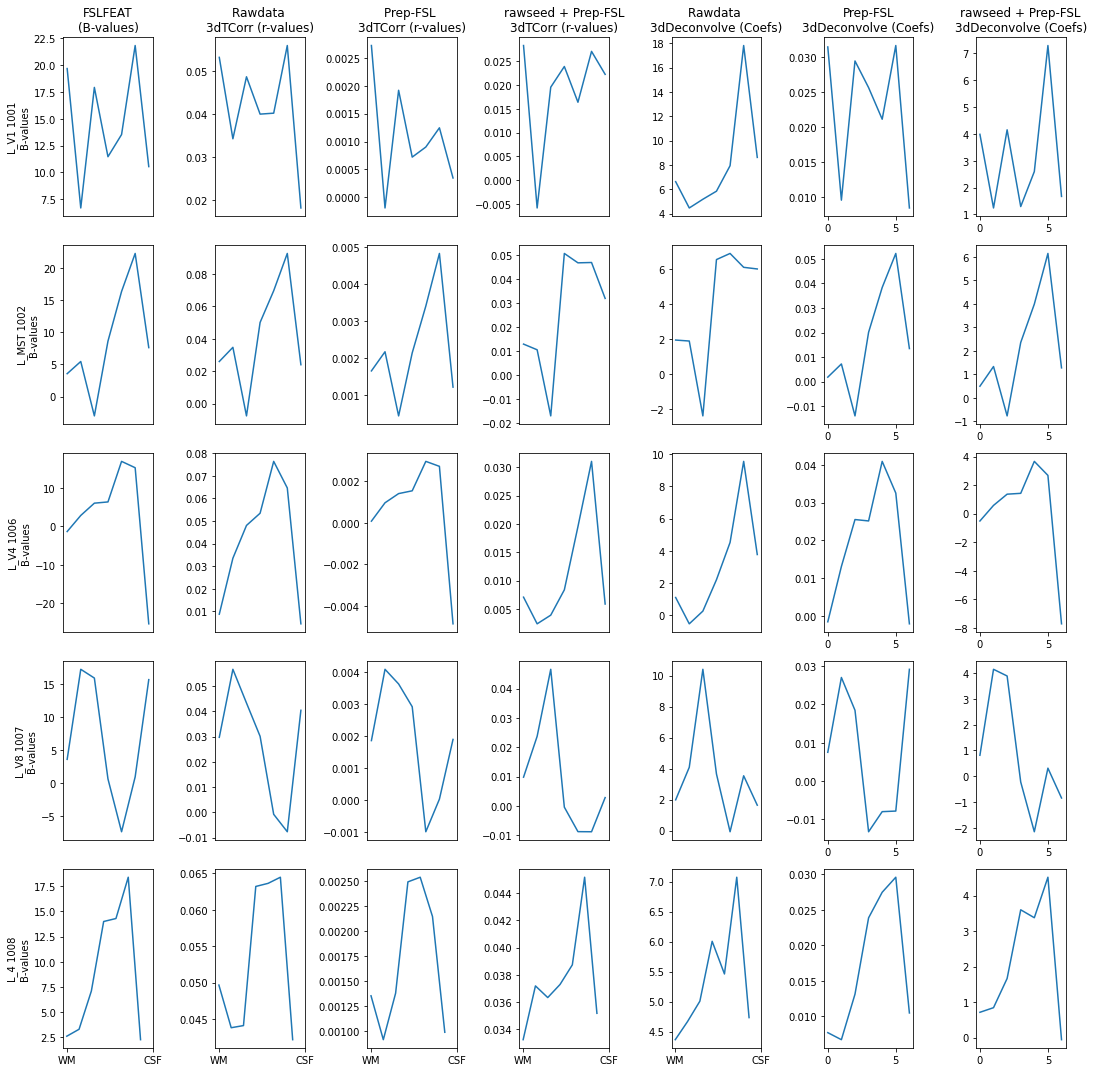

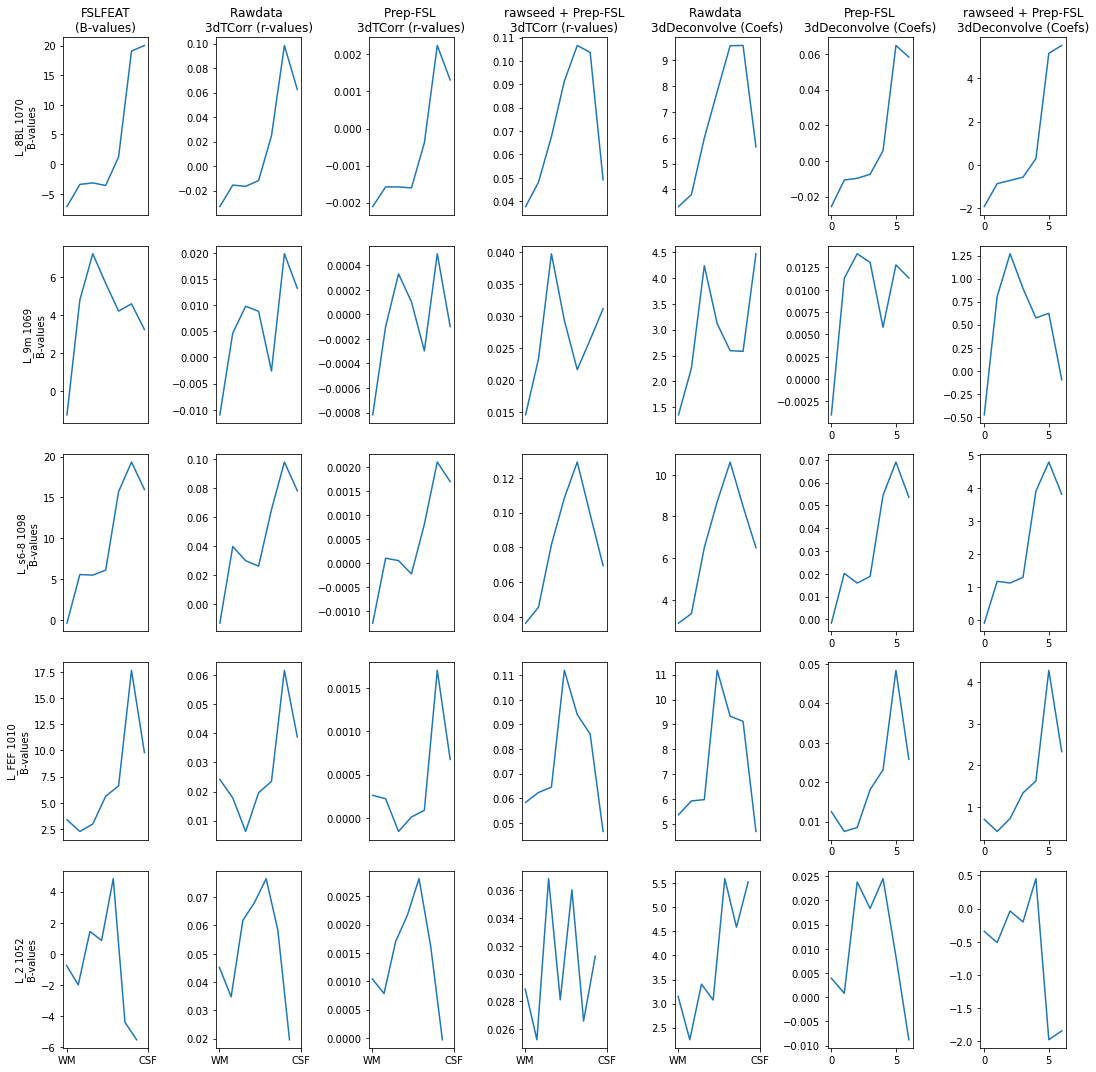

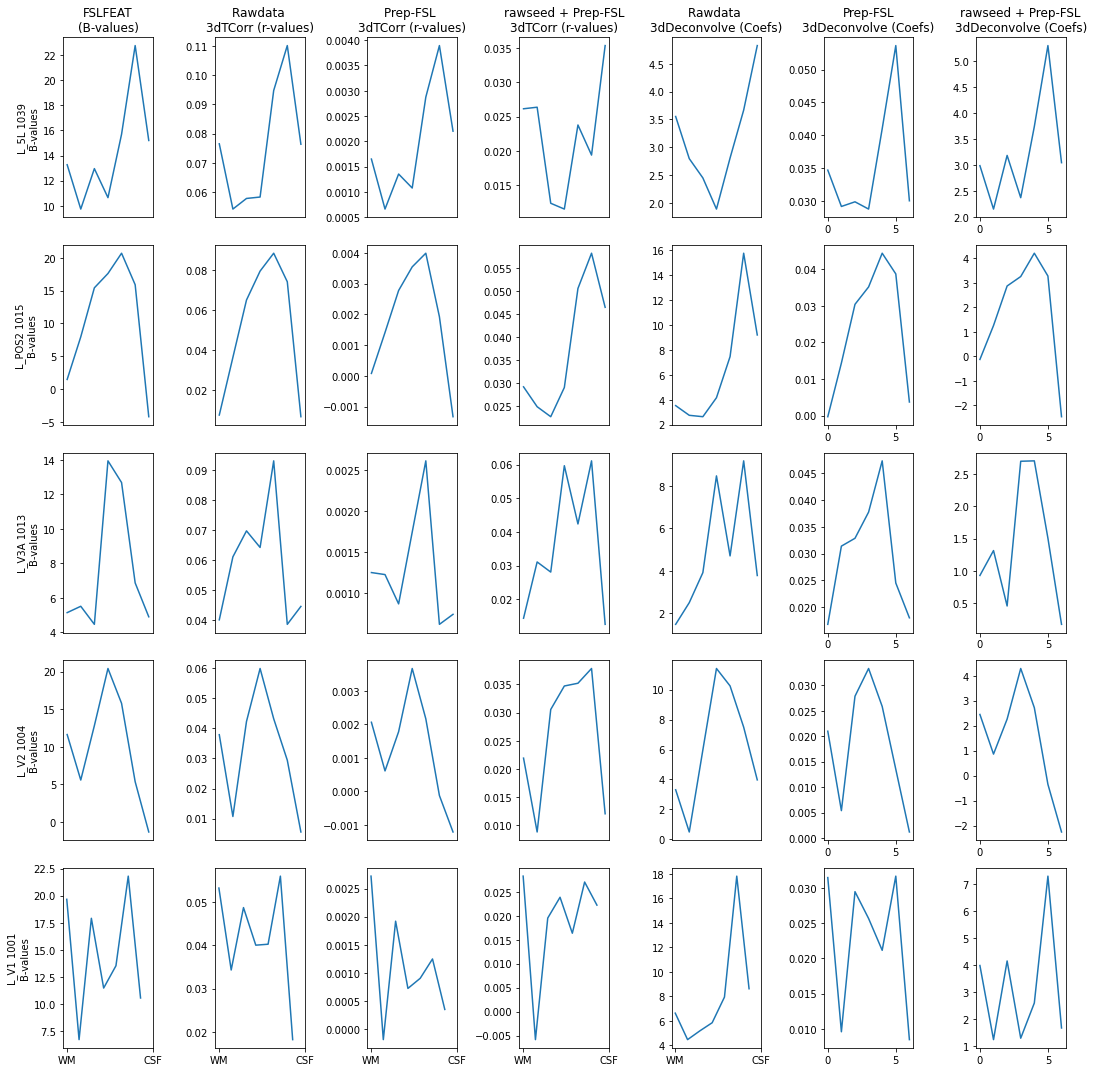

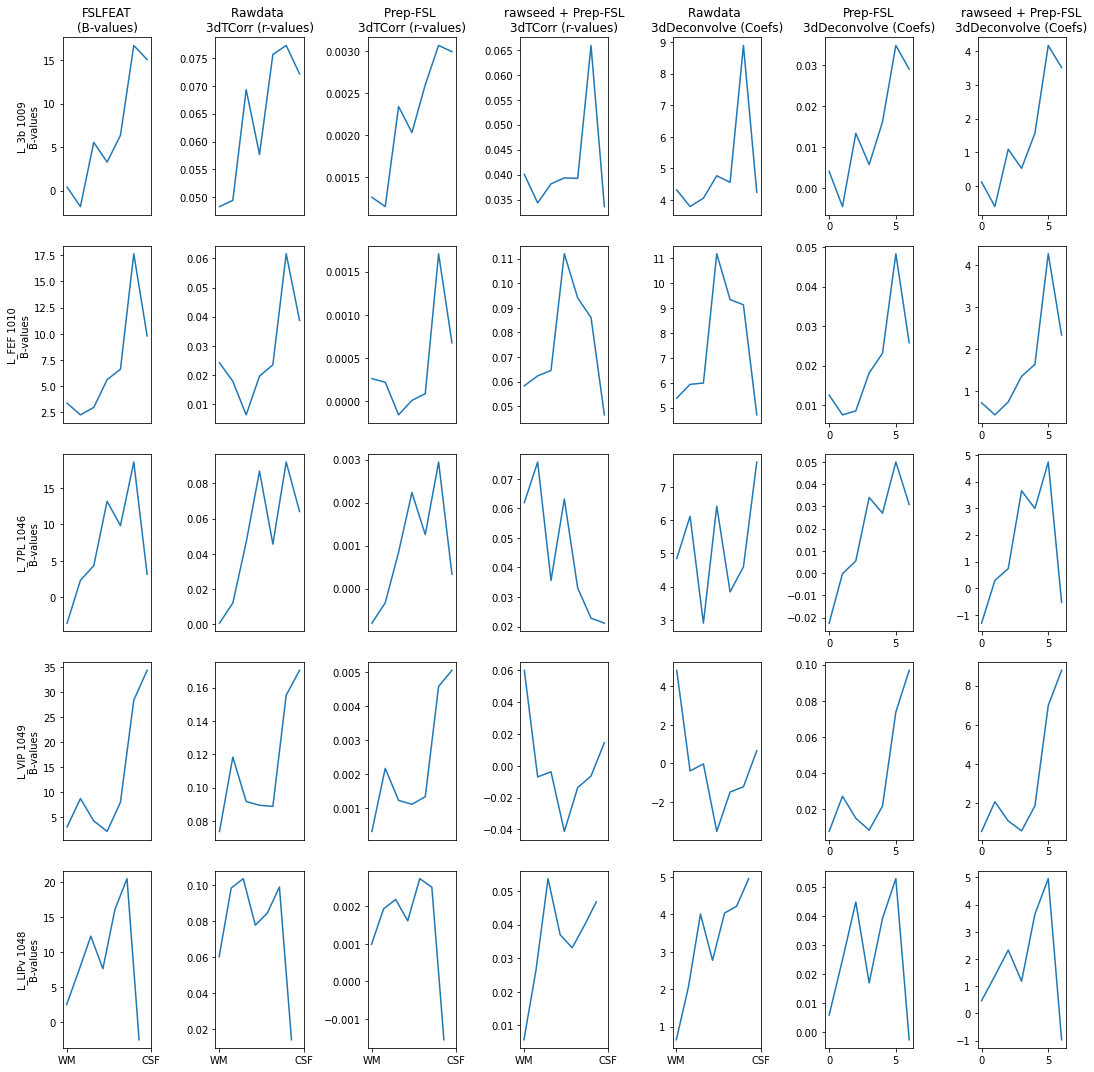

In [10]:

import numpy as np 
from glob import glob 
import matplotlib 

import matplotlib.pyplot as plt
import numpy as np
import os 
import pandas as pd 


work_dir="/data/NIMH_scratch/kleinrl/ds003216-download/derivatives/sub-02/VASO_fun2_comparisons"
dataframe_dir   =work_dir+"/dataframes"
out_dir         =work_dir+"/out"
plot_dir        =work_dir+"/plots_v2"
data_dir        =work_dir+"/data"
roi_dir         =work_dir+"/rois"
os.makedirs(plot_dir, exist_ok=True)

lab_dict_full = pd.read_csv(data_dir+"/LUT_hcp-mmp-b_v2.txt",sep=" ", header=None, names=["id", "lab", "a", "b", "c","d"])
lab_dict_full = dict(zip(lab_dict_full['id'].to_list(), lab_dict_full['lab'].to_list()))

# layers 7=csf, 1=WM

fsl_base=data_dir+"/feat_001"
#path_tstat        =fsl_base+"/stats/tstat1-sub-02_layers-parc_hcp_kenshu-means.npy"
#path_zstat        =fsl_base+"/stats/zstat1-sub-02_layers-parc_hcp_kenshu-means.npy"
path_pe           =fsl_base+"/stats/pe1-sub-02_layers-parc_hcp_kenshu-means.npy"
path_thresh_zstat =fsl_base+"/thresh_zstat1-sub-02_layers-parc_hcp_kenshu-means.npy"

#raw 
f="raw_pca001_v2"
tr="TR5"
path_raw_corr=out_dir+'/{}/sub-02_ses-04_task-movie_run-04_VASO-sub-02_ses-04_task-movie_run-04_VASO-1010.L_FEF.2D.pca_001.1D-CORR-sub-02_layers-parc_hcp_kenshu-means.npy'.format(f, tr)
path_raw_deconv_coefs=out_dir+'/{}/deconv_{}_Coef-sub-02_layers-parc_hcp_kenshu-means.npy'.format(f, tr)
#path_raw_deconv_fstat=out_dir+'/{}/deconv_{}_Fstat-sub-02_layers-parc_hcp_kenshu-means.npy'.format(f, tr)
#path_raw_deconv_fullr2=out_dir+'/{}/deconv_{}_FULLR2-sub-02_layers-parc_hcp_kenshu-means.npy'.format(f, tr)

# preprocessed
f="preprocessed_pca001_v2"
tr="TR5"
path_preproc_corr=out_dir+"/{}/prewhitened_sub-02_ses-04_task-movie_run-04_VASO-prewhitened_sub-02_ses-04_task-movie_run-04_VASO-1010.L_FEF.2D.pca_001.1D-CORR-sub-02_layers-parc_hcp_kenshu-means.npy".format(f)
path_preproc_deconv_coefs=out_dir+'/{}/deconv_{}_Coef-sub-02_layers-parc_hcp_kenshu-means.npy'.format(f, tr)
#path_preproc_deconv_fstat=out_dir+'/{}/deconv_{}_Fstat-sub-02_layers-parc_hcp_kenshu-means.npy'.format(f, tr)
#path_preproc_deconv_fullr2=out_dir+'/{}/deconv_{}_FULLR2-sub-02_layers-parc_hcp_kenshu-means.npy'.format(f, tr)

# preprocessed
f="raw_pca001_seed_across_preproced_FSL"
tr="TR5"
path_raw_seed_preproc_corr=out_dir+"/{}/prewhitened_sub-02_ses-04_task-movie_run-04_VASO-sub-02_ses-04_task-movie_run-04_VASO-1010.L_FEF.2D.pca_001.1D-CORR-sub-02_layers-parc_hcp_kenshu-means.npy".format(f)
path_raw_seed_preproc_deconv_coefs=out_dir+'/{}/deconv_{}_Coef-sub-02_layers-parc_hcp_kenshu-means.npy'.format(f, tr)
#path_raw_seed_preproc_deconv_fstat=out_dir+'/{}/deconv_{}_Fstat-sub-02_layers-parc_hcp_kenshu-means.npy'.format(f, tr)
#path_raw_seed_preproc_deconv_fullr2=out_dir+'/{}/deconv_{}_FULLR2-sub-02_layers-parc_hcp_kenshu-means.npy'.format(f, tr)





d_pe                            = np.load(path_pe)[:,1:]
d_zstat_thresh                  = np.load(path_thresh_zstat)[:,1:]
#d_zstat                        = np.load(df_zstat)[:,1:]
#d_tstat                        = np.load(df_tstat)[:,1:]

d_raw_corr                      = np.load(path_raw_corr)[:,1:]
d_raw_deconv_coefs              = np.load(path_raw_deconv_coefs)[:,1:]

d_preproc_corr                  = np.load(path_preproc_corr)[:,1:]
d_preproc_deconv_coefs          = np.load(path_preproc_deconv_coefs)[:,1:]

d_raw_seed_preproc_corr         = np.load(path_raw_seed_preproc_corr)[:,1:]
d_raw_seed_preproc_deconv_coefs = np.load(path_raw_seed_preproc_deconv_coefs)[:,1:]





def get_plots1(lab_inds, d_pe, d_raw_corr, d_preproc_corr, d_raw_seed_preproc_corr, \
     d_raw_deconv_coefs, d_preproc_deconv_coefs,  d_raw_seed_preproc_deconv_coefs, plot_path):

    rows, cols = 5,7
    fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(15,15)) #, #len_x,len_y
    for i in range(rows):

        target_id = lab_inds[i]
        target_lab = lab_dict_full[ target_id ]

        print(i, target_id, target_lab)
        #fig.suptitle('{} {} '.format(target_id, target_lab))

        pe                              = d_pe[target_id, : ]
        zstat_thresh                    = d_zstat_thresh[target_id, : ]
        #d_zstat                        = np.load(df_zstat)[:,1:][target_id, : ]
        #d_tstat                        = np.load(df_tstat)[:,1:][target_id, : ]

        raw_corr                        = d_raw_corr[target_id, : ]
        raw_deconv_coefs                = d_raw_deconv_coefs[target_id, : ]

        preproc_corr                    = d_preproc_corr[target_id, : ]
        preproc_deconv_coefs            = d_preproc_deconv_coefs[target_id, : ]

        raw_seed_preproc_corr           = d_raw_seed_preproc_corr[target_id, : ]
        raw_seed_preproc_deconv_coefs   = d_raw_seed_preproc_deconv_coefs[target_id, : ]


        axs[i,0].plot(pe)
        
        axs[i,1].plot(raw_corr)
        axs[i,2].plot(preproc_corr)
        axs[i,3].plot(raw_seed_preproc_corr)

        axs[i,4].plot(raw_deconv_coefs)
        axs[i,5].plot(preproc_deconv_coefs)
        axs[i,6].plot(raw_seed_preproc_deconv_coefs)


        if i == 0: 
            axs[i,0].title.set_text("FSLFEAT\n(B-values)")

            axs[i,1].title.set_text("Rawdata \n3dTCorr (r-values)")
            axs[i,2].title.set_text("Prep-FSL \n3dTCorr (r-values)")
            axs[i,3].title.set_text("rawseed + Prep-FSL\n3dTCorr (r-values)")

            axs[i,4].title.set_text("Rawdata \n3dDeconvolve (Coefs)")
            axs[i,5].title.set_text("Prep-FSL\n3dDeconvolve (Coefs)")
            axs[i,6].title.set_text("rawseed + Prep-FSL\n3dDeconvolve (Coefs)")

        
        axs[i,0].set_ylabel("{} {}\nB-values".format(target_lab, target_id))



        axs[i,0].set_xticklabels([])
        axs[i,1].set_xticklabels([])
        axs[i,2].set_xticklabels([])
        axs[i,3].set_xticklabels([])
        axs[i,4].set_xticklabels([])

        axs[i,0].set_xticks([])
        axs[i,1].set_xticks([])
        axs[i,2].set_xticks([])
        axs[i,3].set_xticks([])
        axs[i,4].set_xticks([])

    for j in range(5):
        axs[i,j].set_xticks([0,7])
        axs[i,j].set_xticklabels(["WM","CSF"])

    plt.tight_layout()

    plt.savefig(plot_path)



get_plots1([1001, 1002, 1006, 1007, 1008], d_pe, d_raw_corr, d_raw_deconv_coefs, d_preproc_corr,  \
    d_preproc_deconv_coefs, d_raw_seed_preproc_corr, d_raw_seed_preproc_deconv_coefs, plot_dir+"/plots1_v2.png")

get_plots1([1070, 1069, 1098, 1010, 1052], d_pe, d_raw_corr, d_raw_deconv_coefs, d_preproc_corr, \
    d_preproc_deconv_coefs, d_raw_seed_preproc_corr, d_raw_seed_preproc_deconv_coefs, plot_dir+"/plots2_v2.png")

get_plots1([1039,1015, 1013, 1004, 1001] , d_pe, d_raw_corr, d_raw_deconv_coefs, d_preproc_corr, \
    d_preproc_deconv_coefs, d_raw_seed_preproc_corr, d_raw_seed_preproc_deconv_coefs, plot_dir+"/plots3_v2.png")

get_plots1([1009, 1010, 1046, 1049, 1048] , d_pe, d_raw_corr, d_raw_deconv_coefs, d_preproc_corr, \
    d_preproc_deconv_coefs, d_raw_seed_preproc_corr, d_raw_seed_preproc_deconv_coefs, plot_dir+"/plots4_v2.png")



In [11]:
data        = [d_pe, 
               d_raw_corr, d_preproc_corr, d_raw_seed_preproc_corr, 
               d_raw_deconv_coefs, d_preproc_deconv_coefs, d_raw_seed_preproc_deconv_coefs]
# data_labs   = ["pe", "raw_corr", "raw_deconv_coefs", "preproc_corr", "preproc_deconv_coefs", "raw_seed_preproc_corr",
#                 "raw_seed_preproc_deconv_coefs"]
# data_labs2  = ["FSLFEAT (B-values)", "Rawdata 3dTCorr (r-values)", "Prep-FSL 3dTCorr (r-values)", "rawseed+Prep-FSL 3dTCorr (r-values)", 
#                 "Rawdata 3dDeconvolve (Coefs)", "Prep-FSL 3dDeconvolve (Coefs)", "rawseed+Prep-FSL 3dDeconvolve (Coefs)"]

# data_labs3  = ["FSLFEAT", "Rawdata\n3dTCorr", "FSL-preproced\n3dTCorr", "rawseed+FSL-preproced\n3dTCorr", 
#                 "Rawdata\n3dDeconvolve", "FSL-preproced\n3dDeconvolve", "rawseed+FSL-preproced\n3dDeconvolve"]

data_labs3  = ["FSLFEAT", 
               "Rawdata\n3dTCorr", "FSL-preproced\n3dTCorr", "rawseed+FSL-preproced\n3dTCorr", 
                "Rawdata\n3dDeconvolve", "FSL-preproced\n3dDeconvolve", "rawseed+FSL-preproced\n3dDeconvolve"]

#def get_correlations(data):

len_d = len(data)
results={}

y = [ y for x in [range(1001,1181), range(2001,2181)] for y in x ]

for i in range(1,len_d):
    cc = []
    for c in y: 
        cc.append(np.corrcoef(data[0][c,:], data[i][c,:])[0,1])
    results[i] = cc


corr_map_mean = np.zeros(shape=(len_d,len_d))
corr_map_stdev = np.zeros(shape=(len_d,len_d))

results = []
for i in range(len_d):
    for j in range(len_d):
        cc = []
        for c in y: 
            cc.append(np.corrcoef(data[i][c,:], data[j][c,:])[0,1])
        #results[i] = cc

        cc_stdev    = np.nanstd(cc)
        cc_mean     = np.nanmean(cc)
        cc_count    = len(cc)
        cc_nans     = np.isnan(cc).sum()

        corr_map_mean[i,j]  = cc_mean
        corr_map_stdev[i,j] = cc_stdev

        results.append({'i':i, 'j':j,'std':cc_stdev, 'mean':cc_mean, 'count':cc_count, 'data':cc, 'nans':cc_nans}) 




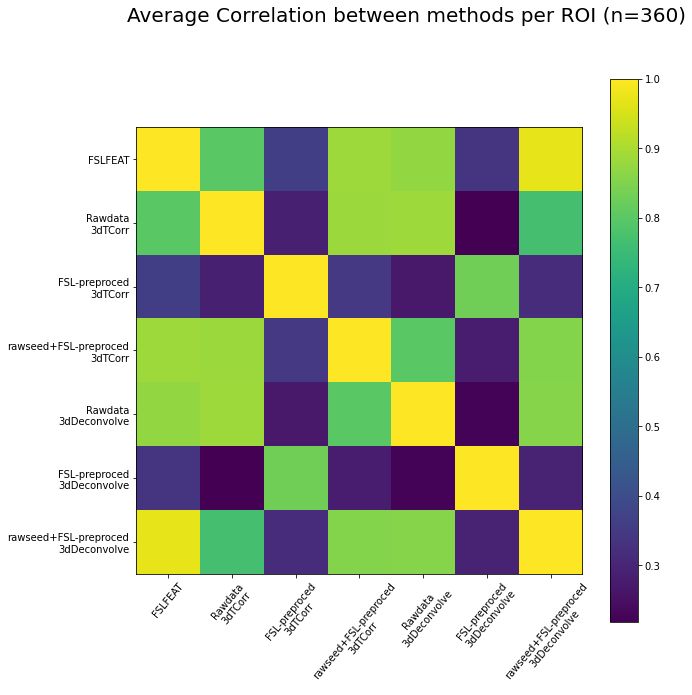

In [12]:
fig = plt.figure(figsize=(10,10))

plt.imshow(corr_map_mean)
plt.colorbar()

plt.yticks(ticks=range(7), labels=data_labs3)
plt.xticks(ticks=range(7), labels=data_labs3, rotation=50)

fig.suptitle('Average Correlation between methods per ROI (n=360)', fontsize=20)
fig.savefig(plot_dir+"/corr_map_newlabs2.png") 

    

In [13]:
import nibabel as nib 

seed_path           = roi_dir+"/LIPd_layers.nii.gz"
target_path         = roi_dir+"/FEF_layers.nii.gz"

seed_layers         = nib.load(seed_path)
target_layers       = nib.load(target_path)

epi_preproc_path    = data_dir+"/prewhitened_sub-02_ses-04_task-movie_run-04_VASO.nii.gz"
epi_path            = data_dir+"/sub-02_ses-04_task-movie_run-04_VASO.nii"

epi_prep            = nib.load(epi_preproc_path)
epi                 = nib.load(epi_path)

seed_data           = seed_layers.get_fdata()
target_data         = target_layers.get_fdata()

epi_prep_data       = epi_prep.get_fdata() 
epi_data            = epi.get_fdata() 



In [14]:

seed_epi_ts = []
seed_epi_prep_ts = [] 
seed_vox_count = []
seed_idx = []

for i in range(1,8):
    idx = np.where(seed_data == i )
    c = len(idx[0])
    
    print("layer {}: {} vox".format(i, c))
    
    seed_epi_ts.append(epi_data[idx])
    seed_epi_prep_ts.append(epi_prep_data[idx])
    seed_vox_count.append(c)
    seed_idx.append([i]*c)

seed_epi_prep_ts    = np.concatenate(seed_epi_prep_ts)
seed_epi_ts         = np.stack(seed_epi_prep_ts)
seed_idx            = np.stack(seed_epi_prep_ts)

print(seed_epi_prep_ts.shape)
print(seed_epi_ts.shape)
print(seed_idx.shape)


target_epi_ts = []
target_epi_prep_ts = [] 
target_vox_count = []
target_idx = []
for i in range(1,8):
    idx = np.where(target_data == i )
    c = len(idx[0])
    
    print("layer {}: {} vox".format(i, c))
    
    target_epi_ts.append(epi_data[idx])
    target_epi_prep_ts.append(epi_prep_data[idx])
    target_vox_count.append(c)
    target_idx.append([i]*c)
    
target_epi_prep_ts    = np.concatenate(target_epi_prep_ts)
target_epi_ts         = np.stack(target_epi_prep_ts)
target_idx            = np.stack(target_epi_prep_ts)

print(target_epi_prep_ts.shape)
print(target_epi_ts.shape)
print(target_idx.shape)


layer 1: 287 vox
layer 2: 118 vox
layer 3: 138 vox
layer 4: 106 vox
layer 5: 159 vox
layer 6: 149 vox
layer 7: 281 vox
(1238, 180)
(1238, 180)
(1238, 180)
layer 1: 349 vox
layer 2: 230 vox
layer 3: 186 vox
layer 4: 189 vox
layer 5: 214 vox
layer 6: 297 vox
layer 7: 383 vox
(1848, 180)
(1848, 180)
(1848, 180)


In [15]:
plt.plot(seed_epi_ts)

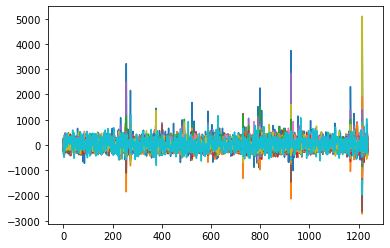

In [ ]:
plt.plot(seed_epi_prep_ts)

In [ ]:
plt.plot([seed_epi_prep_ts[1,:]; seed_epi_ts[1,:]])

SyntaxError: invalid syntax (<ipython-input-9-695c4f70b6b6>, line 1)

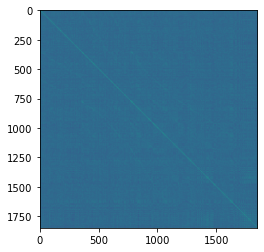

In [ ]:
c = np.corrcoef(target_epi_ts, rowvar=True)
c.shape 
plt.imshow(c)


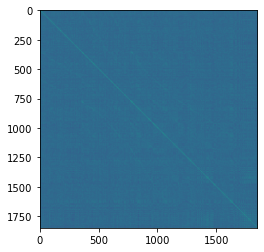

In [ ]:
c = np.corrcoef(target_epi_prep_ts, rowvar=True)
c.shape 

plt.imshow(c)

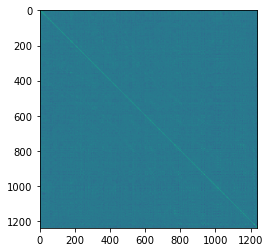

In [ ]:
c = np.corrcoef(seed_epi_ts, rowvar=True)
c.shape 

plt.imshow(c)

In [ ]:
c = np.corrcoef(seed_epi_prep_ts, rowvar=True)
c.shape 

plt.imshow(c)

NameError: name 'np' is not defined

(array([1.07420416e+08, 3.25898110e+08, 2.07104337e+08, 6.92014250e+07,
        3.06998840e+07, 1.32166920e+07, 7.44426000e+06, 3.81818300e+06,
        2.68662200e+06, 7.05727100e+06]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

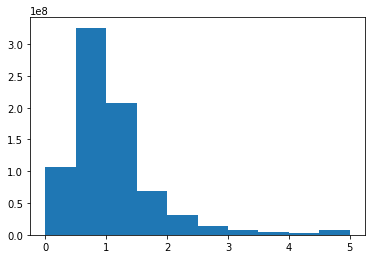

In [ ]:

epi_flat = np.ravel(epi_data)
plt.hist(epi_flat) 





In [ ]:
epi_prep_flat = np.ravel(epi_prep_data)
epi_prep_flat.shape 



plt.hist(epi_prep_flat) 


NameError: name 'np' is not defined